In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Read in the data
df = pd.read_csv("E:\\R\\Assignment 3\\NSSO68.csv")

# Display the first few rows of the dataframe
df.head()


C:\Users\mohit\AppData\Local\Temp\ipykernel_16944\4209780020.py:6: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("E:\\R\\Assignment 3\\NSSO68.csv")


,slno,grp,Round_Centre,FSU_number,Round,Schedule_Number,Sample,Sector,state,State_Region,...,pickle_v,sauce_jam_v,Othrprocessed_v,Beveragestotal_v,foodtotal_v,foodtotal_q,state_1,Region,fruits_df_tt_v,fv_tot
0,1,40999999999999992652495293775872.0,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,0.000000,1141.492400,30.942394,GUJ,2,12.000000,154.18
1,2,40999999999999992652495293775872.0,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,17.500000,1244.553500,29.286153,GUJ,2,333.000000,484.95
2,3,40999999999999992652495293775872.0,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,0.000000,1050.315400,31.527046,GUJ,2,35.000000,214.84
3,4,40999999999999992652495293775872.0,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,33.333333,1142.591667,27.834607,GUJ,2,168.333333,302.30
4,5,40999999999999992652495293775872.0,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,75.000000,945.249500,27.600713,GUJ,2,15.000000,148.00


In [2]:
# Create the Target variable
df['non_veg'] = np.where(df[['eggsno_q', 'fishprawn_q', 'goatmeat_q', 'beef_q', 'pork_q', 'chicken_q', 'othrbirds_q']].sum(axis=1) > 0, 1, 0)

# Display value counts of non_veg
print(df['non_veg'].value_counts())


non_veg
1    68590
0    33072
Name: count, dtype: int64


In [3]:
# Define dependent variable (y) and independent variables (X)
y = df['non_veg']
X = df[['HH_type', 'Religion', 'Social_Group', 'Regular_salary_earner', 'Possess_ration_card', 'Sex', 'Age', 'Marital_Status', 'Education', 'Meals_At_Home', 'Region', 'hhdsz', 'NIC_2008', 'NCO_2004']]

# Display the structure of X
print(X.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101662 entries, 0 to 101661
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   HH_type                101635 non-null  float64
 1   Religion               101659 non-null  float64
 2   Social_Group           101648 non-null  float64
 3   Regular_salary_earner  101650 non-null  float64
 4   Possess_ration_card    101649 non-null  float64
 5   Sex                    101662 non-null  int64  
 6   Age                    101662 non-null  int64  
 7   Marital_Status         101660 non-null  float64
 8   Education              101655 non-null  float64
 9   Meals_At_Home          100443 non-null  float64
 10  Region                 101662 non-null  int64  
 11  hhdsz                  101662 non-null  int64  
 12  NIC_2008               94151 non-null   float64
 13  NCO_2004               94175 non-null   float64
dtypes: float64(10), int64(4)
memory usag

In [4]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Define categorical and numeric features
categorical_features = ['HH_type', 'Religion', 'Social_Group', 'Regular_salary_earner', 'Possess_ration_card', 'Sex', 'Marital_Status', 'Education', 'Meals_At_Home', 'Region']
numeric_features = ['Age', 'hhdsz', 'NIC_2008', 'NCO_2004']

# Create pipelines for preprocessing
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Fit and transform data with preprocessing pipeline
X_preprocessed = preprocessor.fit_transform(X)

# Convert y to numpy array
y = y.values

# Display the shape of preprocessed X and y
print(f"Shape of X after preprocessing: {X_preprocessed.shape}")
print(f"Shape of y: {y.shape}")


Shape of X after preprocessing: (101662, 139)
Shape of y: (101662,)


In [5]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Display shapes of train and test sets
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")


Shape of X_train: (81329, 139)
Shape of X_test: (20333, 139)
Shape of y_train: (81329,)
Shape of y_test: (20333,)


In [6]:
# Import Logistic Regression model
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression model
logreg = LogisticRegression()

# Fit the model
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred = logreg.predict(X_test)

# Display the coefficients
print("Coefficients:", logreg.coef_)


Coefficients: [[ 0.02982957 -0.04422751  0.07344437  0.02624345 -0.10582224  0.1566216
   0.2311345   0.32359396 -0.1021086  -0.26521448 -0.49140057  1.99179842
   1.9921906  -2.33925079 -3.42069306  1.11244468  0.078638    1.31447745
   0.52104693  0.18842636 -0.05396235 -0.4173062   0.08278284  0.15542189
   0.12777709  0.11042765  0.12992327  0.10828146 -0.46979061  0.34150335
   0.16449897  0.20199302 -0.08394612  0.07632027  0.40928059  0.39115899
   0.03319925  0.0581456   0.09364713 -0.08152498 -0.10666037 -0.21914102
   0.04824136 -0.38051596 -3.6959782  -0.15789559 -0.01681312 -0.02184247
   0.         -0.13667401  0.         -0.06016086  0.01013674 -0.92185222
  -0.13884731  0.00777017 -0.02519601 -0.01640226 -0.05517607 -0.0517088
   0.16313534  0.0742874  -0.63871147  0.21892453 -0.12963792  0.05159509
  -0.13388396 -0.12038296 -0.16255624 -0.17641585 -0.65843588  0.0696001
  -0.50237823  0.19604231 -0.41336506  0.09389183  0.265737   -0.21449476
  -0.16568613  0.10188391 -

C:\Users\mohit\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
# Import necessary metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")


Accuracy: 0.7245856489450647
Precision: 0.7511201129319339
Recall: 0.8879053906986868
F1 Score: 0.8138050272642637
Confusion Matrix:
[[ 2495  4055]
 [ 1545 12238]]


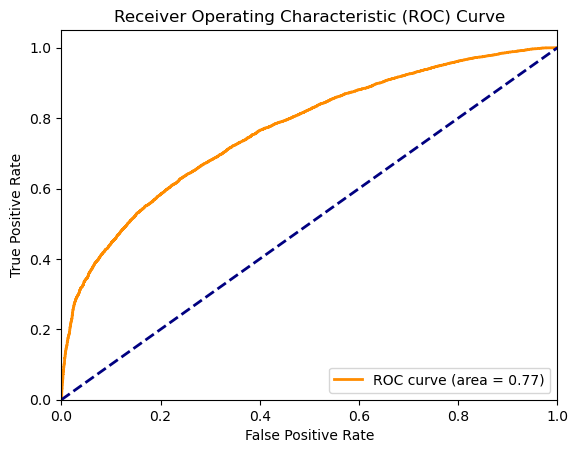

AUC: 0.765879219505387


In [8]:
# Import necessary libraries for ROC curve and AUC
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Predict probabilities for ROC curve
y_prob = logreg.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Display AUC value
print(f"AUC: {roc_auc}")
